# Volumetric Behaviour of (binary) Mixtures from Intermolecular Interactions

In the case of mixtures of monoatomic, spherical molecules, the second order virial coefficient can be computed as: 

$$
B_{mix}=y_iB_{ii}+y_jB_{jj}+2y_iy_jB_{ij}
$$

where $B_{ij}$ is: 

$$
B_{ij}=2\pi{N_A}\int_0^\infty((1-\exp(-\Gamma_{ij}/RT))r^2)dr)
$$

This requires obtaining an interaction potential $\Gamma_{ij}$ for $i\neq{j}$, it can be done via mixing rules. 

## Binary Mixture - System Definition

In [1]:
import matplotlib.pyplot as plt 
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 

#Species=[Ar, Kr, Xe, CH4, N2, C2H4, C2H6, C3H8]
SIGMA=[3.499, 3.846, 4.100, 4.010, 3.694, 4.433, 5.220, 5.711] # Angstrom
EPS=[118.13, 162.74, 222.32, 142.87, 96.26, 202.52, 194.14, 233.28] #K 

#Specie 1 and 2
S1=3
S2=6

#Parameters for the Pure Components
SIGMA1=SIGMA[S1];
SIGMA2=SIGMA[S2];
EPS1=EPS[S1];
EPS2=EPS[S2];

#Lorentz Berthelot Mixing Rules
SIGMA12=np.mean((SIGMA1,SIGMA2))
EPS12=np.sqrt(np.prod((EPS1,EPS2)))

# Temperature range
Temperature = np.linspace(300, 500, 10)

# Gas constant
R=0.082; # l atm K^-1 mol^-1

## Two body interaction potentials

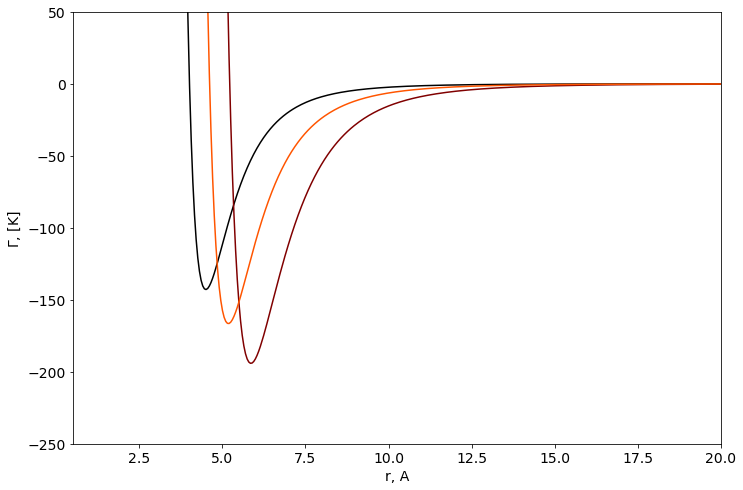

In [2]:
SIGMA_mixture=np.array((SIGMA1,SIGMA2,SIGMA12))
EPS_mixture=np.array((EPS1,EPS2,EPS12))

figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.5,1.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlabel('r, A', fontsize=14);
axes.set_ylabel('$\Gamma$, [K]',fontsize=14);
axes.set_xlim([0.5,20]);
axes.set_ylim([-250,50]);

r = np.linspace(0.3, 25, 500)
Gamma=np.zeros((np.size(r),np.size(SIGMA_mixture)))


color=iter(cm.gist_heat(np.linspace(0,1,np.size(SIGMA_mixture)+1)))

for i in np.arange(0,np.size(SIGMA_mixture)):
    c=next(color)
    sr6=np.power(np.divide(SIGMA_mixture[i],r),6)
    Gamma[:,i]=4*EPS_mixture[i]*(np.power(sr6,2)-sr6)
    axes.plot(r,Gamma[:,i], marker=' ' , c=c);
    

## Second Virial Coefficient

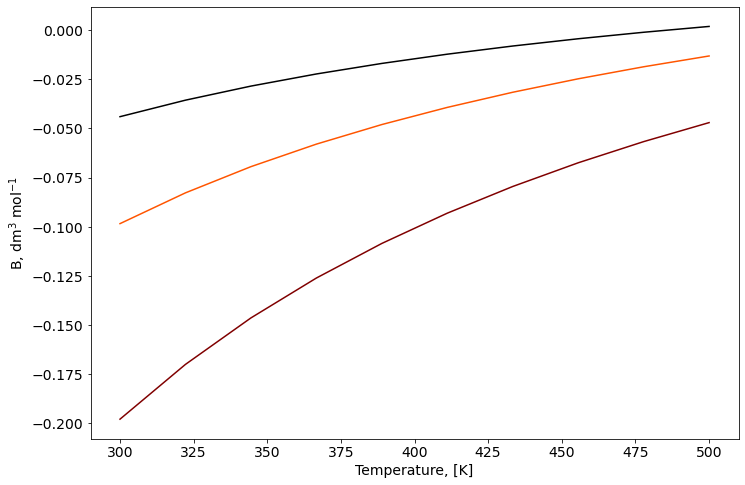

In [3]:
# Compute the second Virial coefficient as a function of T
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.5,1.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

axes.set_xlabel('Temperature, [K]', fontsize=14);
axes.set_ylabel('B, dm$^3$ mol$^{-1}$',fontsize=14);

B=np.zeros((np.size(Temperature),np.size(SIGMA_mixture)))

color=iter(cm.gist_heat(np.linspace(0,1,np.size(SIGMA_mixture)+1)))
for i in np.arange(0,np.size(SIGMA_mixture)):
    c=next(color)
    for j in np.arange(0,np.size(Temperature)):
        B[j,i]=2*np.pi*6E23*np.trapz((1-np.exp(-Gamma[:,i]/Temperature[j]))*np.power(r*1E-9,2),r*1E-9)
    axes.plot(Temperature,B[:,i], marker=' ' , c=c);

## Second Virial Coefficient, function of the mixture composition.

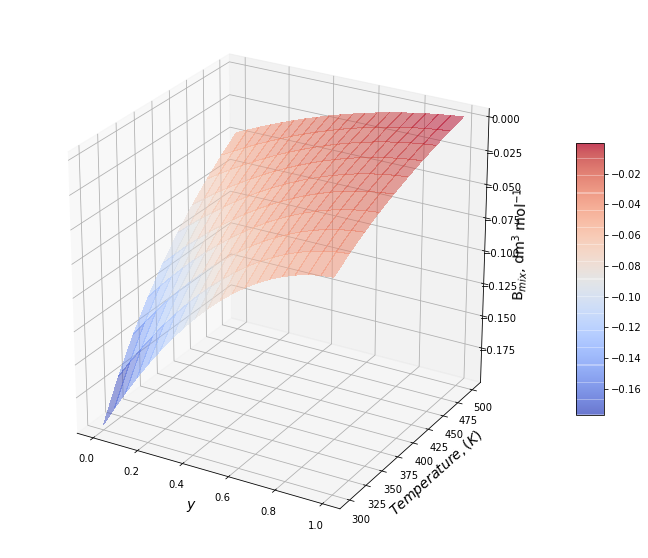

In [4]:
y1=np.linspace(0, 1, 20) # [-]
y2=1-y1

Y1, T = np.meshgrid(y1, Temperature) 

Bmix=np.zeros((np.size(Temperature),np.size(y1)))

figure=plt.figure(figsize=(12, 10))
axes = figure.gca(projection ='3d') 

for i in np.arange(0,np.size(Temperature)):
        Bmix[i,:]=B[i,0]*Y1[i,:]*Y1[i,:]+B[i,1]*(1-Y1[i,:])*(1-Y1[i,:])+B[i,2]*Y1[i,:]*(1-Y1[i,:])

surf=axes.plot_surface(Y1,T,Bmix,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.5)   

axes.view_init(25, -60)
plt.draw()

axes.set_xlabel('$y$', fontsize=14);
axes.set_ylabel('$Temperature, (K)$',fontsize=14);
axes.set_zlabel('B$_{mix}$, dm$^3$ mol$^{-1}$',fontsize=14);     

figure.colorbar(surf, shrink=0.5, aspect=10);

## Properties

### Compressibility factor at constant $\rho_{mix}$

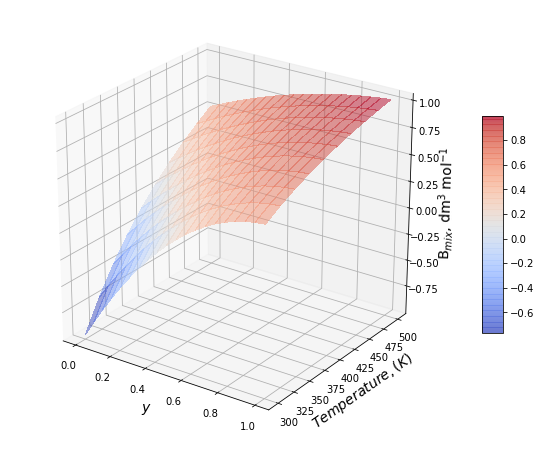

In [5]:
## Define the total density of the mixture
rho=10 # mol / l 

## Z Diagram
Z=1+rho*Bmix

figure=plt.figure(figsize=(10, 8))
axes = figure.gca(projection ='3d') 
axes.view_init(25, -55)
plt.draw()

surf=axes.plot_surface(Y1,T,Z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.5)   

axes.set_xlabel('$y$', fontsize=14);
axes.set_ylabel('$Temperature, (K)$',fontsize=14);
axes.set_zlabel('B$_{mix}$, dm$^3$ mol$^{-1}$',fontsize=14);     
figure.colorbar(surf, shrink=0.5, aspect=10);

## P/v/y diagram at constant T

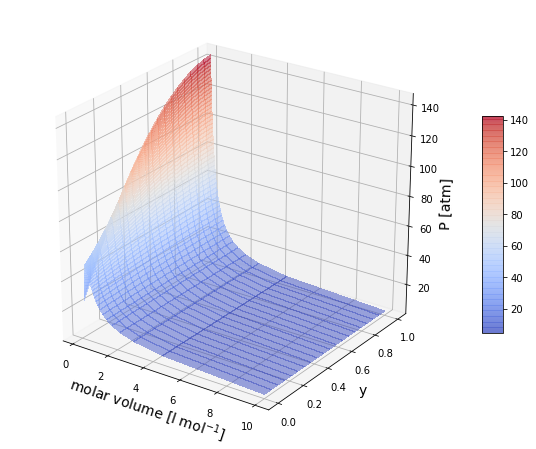

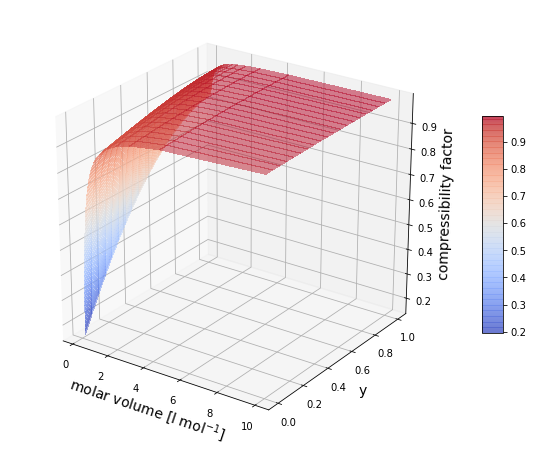

In [6]:
## Define the Temperature
T=350;
rho=np.linspace(0.1, 6, 50) # mol / l

rho_g, Y2 = np.meshgrid(rho, y1) 
BT=np.zeros(np.size(SIGMA_mixture))

for i in np.arange(0,np.size(SIGMA_mixture)):
        BT[i]=2*np.pi*6E23*np.trapz((1-np.exp(-Gamma[:,i]/T))*np.power(r*1E-9,2),r*1E-9)

BmixT=BT[0]*Y2*Y2+BT[1]*(1-Y2)*(1-Y2)+BT[2]*Y2*(1-Y2)
        


P=T*R*rho_g+T*R*rho_g*rho_g*BmixT

Z=1+rho_g*BmixT

figure=plt.figure(figsize=(10, 8))
axes = figure.gca(projection ='3d') 
axes.view_init(25, -55)
plt.draw()

surf=axes.plot_surface(1/rho_g,Y2,P,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.5)   

axes.set_xlabel('molar volume [l mol$^{-1}$]', fontsize=14);
axes.set_ylabel('y',fontsize=14);
axes.set_zlabel('P [atm]',fontsize=14); 
figure.colorbar(surf, shrink=0.5, aspect=10);

figure=plt.figure(figsize=(10, 8))
axes = figure.gca(projection ='3d') 
axes.view_init(25, -55)
plt.draw()

surf=axes.plot_surface(1/rho_g,Y2,Z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.5)   

axes.set_xlabel('molar volume [l mol$^{-1}$]', fontsize=14);
axes.set_ylabel('y',fontsize=14);
axes.set_zlabel('compressibility factor',fontsize=14);   
figure.colorbar(surf, shrink=0.5, aspect=10);